# (ford gobike system data )
## by (Hanan alradadi)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df['start_time']= pd.to_datetime(df['start_time'])
df['start_day_of_week']=df['start_time'].dt.strftime('%a')
df['start_hour_of_day']=df['start_time'].dt.hour
df['end_time']= pd.to_datetime(df['end_time'])
df['end_month']=df['end_time'].dt.strftime('%B')
df['end_day_of_week']=df['end_time'].dt.strftime('%a')
df['end_hour_of_day']=df['end_time'].dt.hour

In [4]:
df['period_day'] = 'morning'
df['period_day'][(df['start_hour_of_day'] >= 12) & (df['start_hour_of_day'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour_of_day'] >= 18) & (df['start_hour_of_day'] <= 23)] = 'night'

<ipython-input-4-52422b316686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_day'][(df['start_hour_of_day'] >= 12) & (df['start_hour_of_day'] <= 17)] = 'afternoon'
<ipython-input-4-52422b316686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_day'][(df['start_hour_of_day'] >= 18) & (df['start_hour_of_day'] <= 23)] = 'night'


### Comparison between the user_type

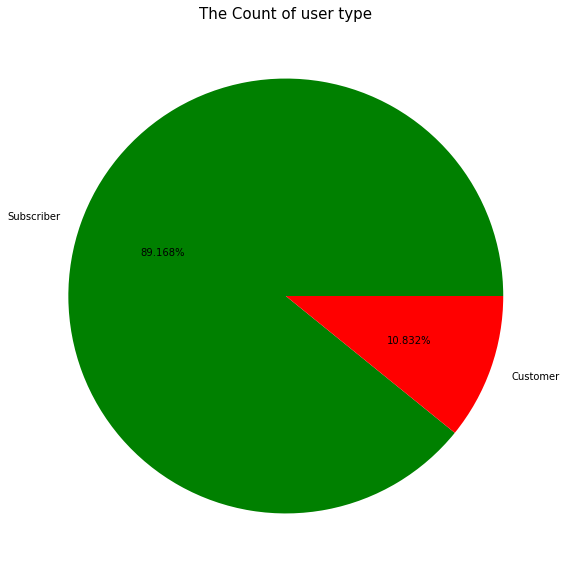

In [5]:
plt.figure(figsize=(10,10))
sorted_counts = df['user_type'].value_counts()
plt.pie(df['user_type'].value_counts(), labels = df['user_type'].value_counts().index , autopct='%1.3f%%',colors = 'green');
plt.title('The Count of user type', fontsize=15);

### The top 20 of starting point

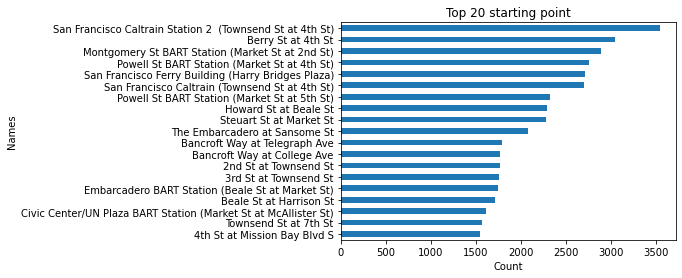

In [6]:
df.start_station_name.value_counts()[1:20].sort_values().plot(kind = 'barh')
plt.title('Top 20 starting point')
plt.xlabel('Count')
plt.ylabel('Names');

# start day of week of day for each gender

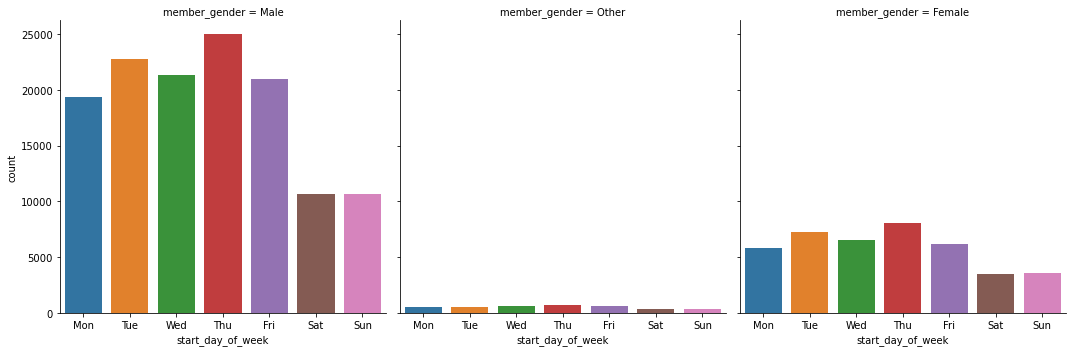

In [7]:
sb.catplot(data=df, x='start_day_of_week', col="member_gender", kind='count', sharey = True , order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

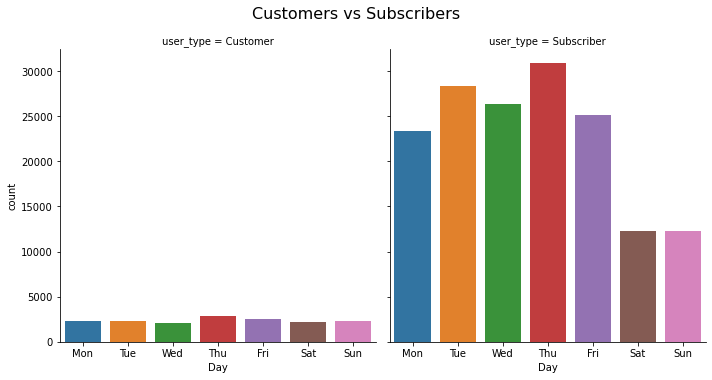

In [18]:

graph = sb.catplot(data=df, x='start_day_of_week', 
                   col="user_type", kind='count' ,order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
graph.set_axis_labels("Day");
graph.fig.suptitle('Customers vs Subscribers',
                   y=1.05, fontsize=16);


### Duration of rips by the start day

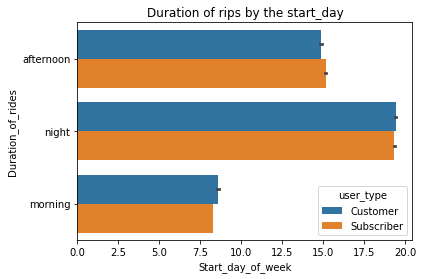

In [9]:

sb.barplot(data=df, x='start_hour_of_day', y='period_day', hue='user_type')
plt.xlabel('Start_day_of_week')
plt.ylabel('Duration_of_rides')
plt.title("Duration of rips by the start_day");

In [10]:

df = df[df["member_birth_year"].isnull() == False]

### end end hou of day for each user type

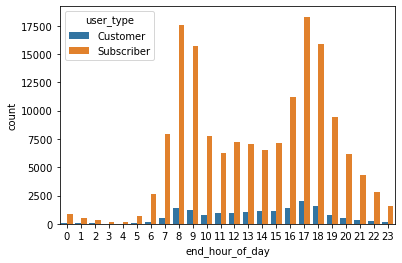

In [11]:

sb.countplot(data = df, x = 'end_hour_of_day', hue = 'user_type');


In [12]:
!jupyter nbconvert slide.ipynb --to slides -post serve --no-input -template output-toggle.tpl

[NbConvertApp] WARNING | Unrecognized alias: 'post', it will have no effect.
[NbConvertApp] WARNING | Unrecognized alias: 'template', it will have no effect.
[NbConvertApp] Converting notebook slide.ipynb to slides
[NbConvertApp] Writing 703113 bytes to slide.slides.html
